# 1. Perkenalan

Nama    : Dwi Bagus Prasetyo

Batch   : FTDS RMT-027

Objective : Memprediksi seseorang apakah seorang Peminum atau tidak berdasarkan body signal orang tersebut.

Details of dataset:
| Column | Description |
| --- | --- |
| Sex | male, female |
| age | round up to 5 years	|
| height | round up to 5 cm [cm] |
| weight | [kg] |
| sight_left | eyesight(left) |
| sight_right | eyesight(right) |
| hear_left | hearing left, 1(normal), 2(abnormal) |
| hear_right | hearing right, 1(normal), 2(abnormal) |
| SBP | Systolic blood pressure[mmHg] |
| DBP | Diastolic blood pressure[mmHg] |
| BLDS | BLDS or FSG(fasting blood glucose)[mg/dL] |
| tot_chole | total cholesterol[mg/dL] |
| HDL_chole | HDL cholesterol[mg/dL] |
| LDL_chole | LDL cholesterol[mg/dL] |
| triglyceride | triglyceride[mg/dL] |
| hemoglobin | hemoglobin[g/dL] |
| urine_protein | protein in urine, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4) |
| serum_creatinine | serum(blood) creatinine[mg/dL] |
| SGOT_AST | SGOT(Glutamate-oxaloacetate transaminase) AST(Aspartate transaminase)[IU/L] |
| SGOT_ALT | ALT(Alanine transaminase)[IU/L] |
| gamma_GTP | y-glutamyl transpeptidase[IU/L] |
| SMK_stat_type_cd | Smoking state, 1(never), 2(used to smoke but quit), 3(still smoke) |
| DRK_YN | Drinker or Not |

# 2. Import Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from feature_engine.outliers import Winsorizer
from scipy.stats import kendalltau
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


#evaluasi
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

# 3. Data Loading

In [3]:
# load file csv to dataframe
df = pd.read_csv('smoking_driking_dataset_Ver01.csv')

In [4]:
# tampilkan 10 baris teratas
df.head(10)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
5,Male,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,...,95.0,232.0,13.8,3.0,0.8,29.0,40.0,37.0,3.0,Y
6,Female,45,150,55,69.0,0.5,0.4,1.0,1.0,101.0,...,115.0,75.0,12.3,1.0,0.8,19.0,12.0,12.0,1.0,N
7,Male,35,175,65,84.2,1.2,1.0,1.0,1.0,132.0,...,107.0,101.0,14.4,1.0,0.8,18.0,18.0,35.0,3.0,Y
8,Male,55,170,75,84.0,1.2,0.9,1.0,1.0,145.0,...,141.0,100.0,15.1,1.0,0.8,32.0,23.0,26.0,1.0,Y
9,Male,40,175,75,82.0,1.5,1.5,1.0,1.0,132.0,...,118.0,83.0,13.9,1.0,0.9,21.0,38.0,16.0,2.0,Y


In [5]:
# tampilkan 10 baris terbawah
df.tail(10)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
991336,Male,80,170,60,74.0,1.0,0.9,1.0,1.0,139.0,...,84.0,57.0,12.0,1.0,1.2,18.0,11.0,15.0,2.0,Y
991337,Female,35,165,70,81.0,1.0,1.0,1.0,1.0,113.0,...,92.0,88.0,13.3,1.0,0.7,20.0,17.0,12.0,1.0,N
991338,Male,20,175,65,74.5,1.0,1.5,1.0,1.0,105.0,...,120.0,92.0,15.4,1.0,0.8,25.0,26.0,50.0,2.0,Y
991339,Male,70,165,60,78.0,0.9,0.8,1.0,1.0,137.0,...,89.0,105.0,16.1,1.0,1.0,23.0,13.0,32.0,1.0,Y
991340,Female,50,150,50,72.6,1.0,1.0,1.0,1.0,116.0,...,105.0,125.0,15.2,1.0,0.8,28.0,26.0,29.0,1.0,N
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N
991345,Male,50,160,70,90.5,1.0,1.5,1.0,1.0,133.0,...,153.0,163.0,15.8,1.0,0.9,24.0,43.0,36.0,3.0,Y


In [6]:
# tampilkan nama kolom pada dataset
df.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [7]:
# Ubah nama kolom
df.rename(columns={'SMK_stat_type_cd': 'Smoking State', 'DRK_YN': 'Drinker'}, inplace=True)

In [8]:
# tampilkan informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [9]:
# Tampilkan jumlah kolom yang kategorik beserta listnya
print('Jumlah kolom dengan tipe kategorik sebanyak', len(df.select_dtypes(include='object').columns))
print('Dengan list ', df.select_dtypes(include='object').columns.to_list())

Jumlah kolom dengan tipe kategorik sebanyak 2
Dengan list  ['sex', 'Drinker']


In [10]:
# Tampilkan jumlah kolom yang nnumerik beserta listnya
print('Jumlah kolom dengan tipe numerik sebanyak', len(df.select_dtypes(include='number').columns))
print('Dengan list', df.select_dtypes(include='number').columns.to_list())

Jumlah kolom dengan tipe numerik sebanyak 22
Dengan list ['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'Smoking State']


Dataset terdiri dari 2 kolom tipe kategorik dan 22 kolom tipe numerik

In [11]:
df.shape

(991346, 24)

Dataset terdiri dari 991346 baris dan 24 kolom

# 4. Exploratory Data Analysis (EDA)

**Melihat nilai deskriptif dari kolom numerik pada dataset**

In [12]:
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,Smoking State
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


**Persentase Peminum pada Dataset**

In [13]:
df['Drinker'].value_counts(normalize=True)

Drinker
N    0.500187
Y    0.499813
Name: proportion, dtype: float64

<Axes: xlabel='Peminum atau Tidak', ylabel='Jumlah'>

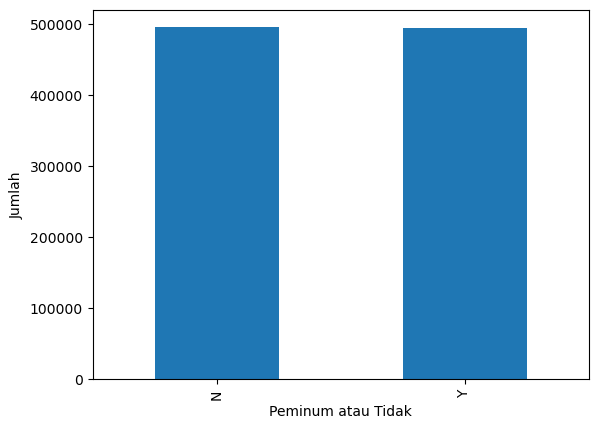

In [14]:
df['Drinker'].value_counts().plot(kind='bar', xlabel='Peminum atau Tidak', ylabel='Jumlah')

Dari hasil cek dan chart dapat dilihat bahwa persentase antar peminum dengan yang tidak, bersifat seimbang/balance

**Perbandingan Peminum pada tiap Gender**

Text(0.5, 1.0, 'Perbandingan Peminum pada tiap Gender')

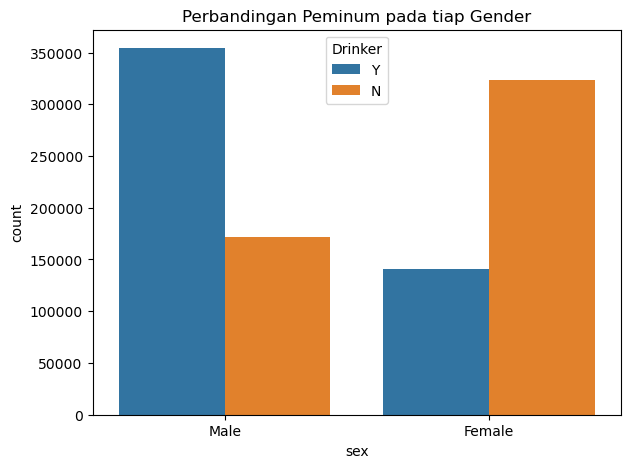

In [15]:
# buat plot perbandingan peminum/tidak tiap gender
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(x=df['sex'], hue=df['Drinker'])
plt.title('Perbandingan Peminum pada tiap Gender')

Kalau kita lihat dari chart diatas bahwa Peminum laki-laki lebih banyak dari pada peminum perempuan. Dan juga perempuan lebih banyak yang bukan Peminum dibandingkan dengan yang Peminum

**Cek distribusi data tiap kolom**

In [16]:
num_list = df.columns.drop(labels=['sex', 'hear_left', 'hear_right', 'urine_protein', 'Smoking State', 'Drinker']).to_list()
list_item = []

# Hitung nilai skew setiap kolom pada dataset
for col in num_list:
  list_item.append([col, df[col].skew()])

# Hasil perhitungan dijadikan dataframe
nilai_skew = pd.DataFrame(columns = ['nama kolom', 'nilai skewness'], data = list_item)
nilai_skew

,nama kolom,nilai skewness
0,age,0.153653
1,height,-0.022737
2,weight,0.576557
3,waistline,26.788440
4,sight_left,9.994626
5,sight_right,10.033647
6,SBP,0.482060
7,DBP,0.400034
8,BLDS,4.617377
9,tot_chole,1.556882


In [17]:
# Ambil kolom yang nilai skew diatas 0.5 atau dibawah -0.5 sebagai kolom yang bersifat skew
col_skew = nilai_skew['nama kolom'][(nilai_skew['nilai skewness']>0.5) | (nilai_skew['nilai skewness']<-0.5)].to_list()

# Ambil selain dari kolom bersifat skew dari colom numerik sebagai kolom bersifat normal
col_norm = [col for col in num_list if col not in col_skew]
col_skew

['weight',
 'waistline',
 'sight_left',
 'sight_right',
 'BLDS',
 'tot_chole',
 'HDL_chole',
 'LDL_chole',
 'triglyceride',
 'serum_creatinine',
 'SGOT_AST',
 'SGOT_ALT',
 'gamma_GTP']

In [18]:
col_norm

['age', 'height', 'SBP', 'DBP', 'hemoglobin']

Dari hasil perhitungan nilai skewnya, didapat:
1. kolom weight, waistline, sight_left, sight_right, BLDS, tot_chole, HDL_chole, LDL_chole, triglyceride, serum_creatinine, SGOT_AST, SGOT_ALT, gamma_GTP bersifat skew
2. kolom age, height, SBP, DBP, hemoglobin memiliki distribusi normal

**Cek Missing Value pada Dataset**

In [19]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values and the count of missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


Tidak ada missing value pada dataset

# 5. Featuring Engineering

## Split between `X` (Features) and `y` (Target)

In [20]:
list_y = []
for i in df['Drinker']:
    if i == 'N':
        list_y.append(0)
    else:
        list_y.append(1)

df['Drinker'] = list_y
df.head(10)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,Smoking State,Drinker
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0
5,Male,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,...,95.0,232.0,13.8,3.0,0.8,29.0,40.0,37.0,3.0,1
6,Female,45,150,55,69.0,0.5,0.4,1.0,1.0,101.0,...,115.0,75.0,12.3,1.0,0.8,19.0,12.0,12.0,1.0,0
7,Male,35,175,65,84.2,1.2,1.0,1.0,1.0,132.0,...,107.0,101.0,14.4,1.0,0.8,18.0,18.0,35.0,3.0,1
8,Male,55,170,75,84.0,1.2,0.9,1.0,1.0,145.0,...,141.0,100.0,15.1,1.0,0.8,32.0,23.0,26.0,1.0,1
9,Male,40,175,75,82.0,1.5,1.5,1.0,1.0,132.0,...,118.0,83.0,13.9,1.0,0.9,21.0,38.0,16.0,2.0,1


In [21]:
X = df.drop(['Drinker'], axis=1) # X diambil dari kolom selain DRK_YN
y = df['Drinker'] # y diambil dari kolom DRK_YN

X.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,Smoking State
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0


## Split between Train-Set and Test-Set

In [22]:
#Splitting between train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21, stratify=y)
print('X_Train Size: ', X_train.shape)
print('X_Test Size: ', X_test.shape)
print('y_train Size: ', y_train.shape)
print('y_test Size: ', y_test.shape)

X_Train Size:  (793076, 23)
X_Test Size:  (198270, 23)
y_train Size:  (793076,)
y_test Size:  (198270,)


Setelah di split data train dan test dengan rasio 20% didapat
- X_train : 793076 baris dan 23 kolom
- X_test : 198270 baris dan 23 kolom
- y_train : 793076 baris
- y_test : 198270 baris

## Handling Cardinality

In [23]:
# Ambil data yang merupakan kategorik
cat_list = X_train.select_dtypes(include = 'object').columns.tolist()
cat_list

['sex']

In [24]:
X_train['sex'].unique()

array(['Female', 'Male'], dtype=object)

Dari hasil pengecekan kolom kategorik yaitu hanya kolom sex dan kalau kita lihat kategorik pada kolom sex bersifat low cardinality jadi tidak perlu kita handle.\
Namun kalau kita cek lagi dari dataset sebenarnya ada kolom kategorik lain hanya sajak sudah di encode menjadi numerikal seperti kolom:
- hear left (ordinal)
- hear right (ordinal)
- urine protein (ordinal)
- Smoking State (ordinal)

oleh karena itu kita bisa membuat list katergorikal yang terdiri dari kolom sex, hear left, hear right, urine protein, dan smoking state

In [25]:
# List kolom kategorik
cat_list = ['sex', 'hear_left', 'hear_right', 'urine_protein', 'Smoking State']

In [26]:
X_train_cat = X_train[cat_list].copy()
X_test_cat = X_test[cat_list].copy()

X_train_cat.head()

,sex,hear_left,hear_right,urine_protein,Smoking State
452498,Female,1.0,1.0,1.0,1.0
156305,Female,1.0,1.0,1.0,1.0
928293,Female,1.0,1.0,1.0,1.0
54411,Female,1.0,1.0,1.0,1.0
58492,Male,1.0,1.0,1.0,2.0


## Handling Outlier

**Cek persentasi Outluer dari setiap kolom numerik**

In [27]:
## Buat function untuk mengkalkulasi upper dan lower

# untuk kolom yang bersifat normal
def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

# untuk kolom yang bersifat skew
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [28]:
nama_kolom = []
list_upper_boundary = []
list_lower_boundary = []
list_skewed = []
list_outlier = []

# looping untuk mendapatkan nilai upper boundary dan lower boundary dari tiap kolom numerik serta persentase outliernya
for col in num_list:
    if col in col_norm:
        # print('kolom normal', col)
        upper_boundary, lower_boundary = find_normal_boundaries(X_train, col)
        nama_kolom.append(col)
        list_skewed.append('Normal')
        list_upper_boundary.append(upper_boundary)
        list_lower_boundary.append(lower_boundary)
        list_outlier.append(len(X_train[(X_train[col] > upper_boundary) | (X_train[col] < lower_boundary)])/ len(X_train) * 100)
    elif col in col_skew:
        # print('kolom skew', col)
        upper_boundary, lower_boundary = find_skewed_boundaries(X_train, col, 3)
        nama_kolom.append(col)
        list_skewed.append('Skewed')
        list_upper_boundary.append(upper_boundary)
        list_lower_boundary.append(lower_boundary)
        list_outlier.append(len(X_train[(X_train[col] > upper_boundary) | (X_train[col] < lower_boundary)])/ len(X_train) * 100)

In [29]:
data_outlier = pd.DataFrame()
data_outlier['Nama Kolom'] = nama_kolom
data_outlier['Nilai Skewnes'] = nilai_skew['nilai skewness']
data_outlier['Skewed'] = list_skewed
data_outlier['Upper Boundary'] = list_upper_boundary
data_outlier['Lower Boundary'] = list_lower_boundary
data_outlier['Persentase Outlier'] = list_outlier
data_outlier[data_outlier['Persentase Outlier']>0]

,Nama Kolom,Nilai Skewnes,Skewed,Upper Boundary,Lower Boundary,Persentase Outlier
1,height,-0.022737,Normal,190.094197,134.381074,0.008574
2,weight,0.576557,Skewed,115.000000,10.000000,0.037323
3,waistline,26.788440,Skewed,128.900000,33.000000,0.009835
4,sight_left,9.994626,Skewed,2.700000,-0.800000,0.314093
5,sight_right,10.033647,Skewed,2.700000,-0.800000,0.309428
6,SBP,0.482060,Normal,166.033315,78.820944,0.646092
7,DBP,0.400034,Normal,105.692147,46.404263,0.622008
8,BLDS,4.617377,Skewed,156.000000,37.000000,2.800488
9,tot_chole,1.556882,Skewed,369.000000,19.000000,0.051824
10,HDL_chole,104.577635,Skewed,126.000000,-14.000000,0.060902


Dari hasil perhitungan persentase outlier untuk kolom bersifat numerik, hampir semua kolom memiliki outlier walaupun persentasenya kecil kecuali kolom age yang tidak ada outliernya

**Handling Outlier**

In [30]:
# Capping the normal distribution
winsoriser_normal = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables= col_norm,
                            missing_values='ignore')

X_train_capped = winsoriser_normal.fit_transform(X_train)
X_test_capped = winsoriser_normal.transform(X_test)

In [31]:
#Handling outlier skewed dist
winsorizer_notnormal = Winsorizer(capping_method = 'iqr',
                                  tail = 'both',
                                  fold = 3,
                                  variables = col_skew,
                                  missing_values='ignore')
X_train_capped = winsorizer_notnormal.fit_transform(X_train_capped)
X_test_capped = winsorizer_notnormal.transform(X_test_capped)

## Handling Missing Values

In [32]:
X_train.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
Smoking State       0
dtype: int64

In [33]:
X_test.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
Smoking State       0
dtype: int64

In [34]:
y_train.isnull().sum()

0

In [35]:
y_test.isnull().sum()

0

Tidak ada missing value pada data train dan data test begitu juga pada target train dan test

## Feature Selection

**Cek Korelasi antar kolom dengan target**

In [36]:
X_train_capped.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'Smoking State'],
      dtype='object')

In [37]:
#melihat korelasi antar kolom dengan target berdasarkan nilai p-value nya

p_values = []
interpretasi = []
cols = []

for col in X_train_capped.columns:
  corr_coef, p_value = kendalltau(X_train_capped[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value<0.05:
    interpretasi.append('ada korelasi')
  else:
    interpretasi.append('Tidak ada korelasi')
pd.DataFrame({'nama kolom' : cols,
             'hasil' : interpretasi})

,nama kolom,hasil
0,sex,ada korelasi
1,age,ada korelasi
2,height,ada korelasi
3,weight,ada korelasi
4,waistline,ada korelasi
5,sight_left,ada korelasi
6,sight_right,ada korelasi
7,hear_left,ada korelasi
8,hear_right,ada korelasi
9,SBP,ada korelasi


Berdasarkan hasil pengecekan korelasi didapatkan bahwa semua kolom memiliki korelasi dengan target (Drinker) sehingga kita akan pakai semua feature untuk modeling

## Pipeline untuk Preprocessing

In [38]:
print('Kolom Kategorik', cat_list)
print('Numerikal Kolom yang skew', col_skew)
print('Numerikal Kolom yang normal', col_norm)

Kolom Kategorik ['sex', 'hear_left', 'hear_right', 'urine_protein', 'Smoking State']
Numerikal Kolom yang skew ['weight', 'waistline', 'sight_left', 'sight_right', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']
Numerikal Kolom yang normal ['age', 'height', 'SBP', 'DBP', 'hemoglobin']


In [39]:
cat_one_hot = ['sex']

In [40]:
# make pipeline for preprocessing
num_skew_pipeline = make_pipeline(MinMaxScaler())
num_norm_pipeline = make_pipeline(StandardScaler())
cat_one_hot_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprocessing_pipeline = ColumnTransformer([
    ('pipe_num_skew', num_skew_pipeline, col_skew),
    ('pipe_num_norm', num_norm_pipeline, col_norm),
    ('pipe_cat_one_hot', cat_one_hot_pipeline, cat_one_hot)

],
remainder="passthrough",
)


In [41]:
preprocessing_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_num_skew',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['weight', 'waistline', 'sight_left',
                                  'sight_right', 'BLDS', 'tot_chole',
                                  'HDL_chole', 'LDL_chole', 'triglyceride',
                                  'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
                                  'gamma_GTP']),
                                ('pipe_num_norm',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'height', 'SBP', 'DBP', 'hemoglobin']),
                                ('pipe_cat_one_hot',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['sex'])])

In [42]:
X_train_final= preprocessing_pipeline.fit_transform(X_train_capped)
X_test_final= preprocessing_pipeline.transform(X_test_capped)

In [43]:
X_train_final.shape

(793076, 24)

In [44]:
X_train_final

array([[0.38888889, 0.58394161, 0.19230769, ..., 1.        , 1.        ,
        1.        ],
       [0.44444444, 0.60479666, 0.26923077, ..., 1.        , 1.        ,
        1.        ],
       [0.38888889, 0.51094891, 0.19230769, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.22222222, 0.39624609, 0.15384615, ..., 1.        , 1.        ,
        1.        ],
       [0.55555556, 0.59228363, 0.34615385, ..., 1.        , 1.        ,
        1.        ],
       [0.5       , 0.53180396, 0.42307692, ..., 1.        , 1.        ,
        2.        ]])

In [45]:
# Mengambil sampel baris dari data
sample_size = 100000
num_rows = X_train_final.shape[0]

# Mendapatkan indeks sampel secara acak
np.random.seed(21)
sample_indices = np.random.choice(num_rows, size=sample_size, replace=False)
X_train_final_sample = X_train_final[sample_indices]

y_train_sample = y_train.values[sample_indices]
y_train_sample

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

# 6. Model Definition

**Model KNN**

In [46]:
# Definisikan Model KNN dengan parameter default
model_knn = KNeighborsClassifier()

**Model SVM**

In [47]:
# Definisikan Model SVM dengan parameter default
model_SVM = SVC()

**Model Decision Tree Classification**

In [48]:
# Definisikan Model Decission Tree Classification dengan parameter default
model_dt = DecisionTreeClassifier()

**Model Random Forest Classification**

In [49]:
# Definisikan Model Random Forest Classification dengan parameter default
model_rf = RandomForestClassifier()

**Adaboost Model DecisionTree**

In [50]:
# inisiasi model adaboost
adaboost_clf = AdaBoostClassifier(estimator=model_dt, n_estimators=50, random_state=21)

# 7. Model Training

**Training Model KNN**

In [51]:
# Training Model KNN
model_knn.fit(X_train_final, y_train)

KNeighborsClassifier()

**Training Model SVM**

In [52]:
# Training Model SVM
model_SVM.fit(X_train_final_sample, y_train_sample)

SVC()

**Training Model Decision Tree Clasification**

In [53]:
# Training Model Decision Tree Classification
model_dt.fit(X_train_final, y_train)

DecisionTreeClassifier()

**Training Model Random Forest Classification**

In [54]:
# Training Model Random Forest Classification
model_rf.fit(X_train_final, y_train)

RandomForestClassifier()

**Training Model Adaboost**

In [55]:
adaboost_clf.fit(X_train_final, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=21)

# 8. Model Evaluation

Karena fokus kita ingin memprediksi apakah seseorang merupakan Peminum atau tidak maka kita bisa melihat dari nilai recall nya 

## Evaluasi Model KNN

### Cek Performa model KNN pada data Train

F1 Score - Train Set  :  0.785932070660855 

Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.77      0.78    396686
           1       0.78      0.80      0.79    396390

    accuracy                           0.78    793076
   macro avg       0.78      0.78      0.78    793076
weighted avg       0.78      0.78      0.78    793076
 

Confusion Matrix      : 


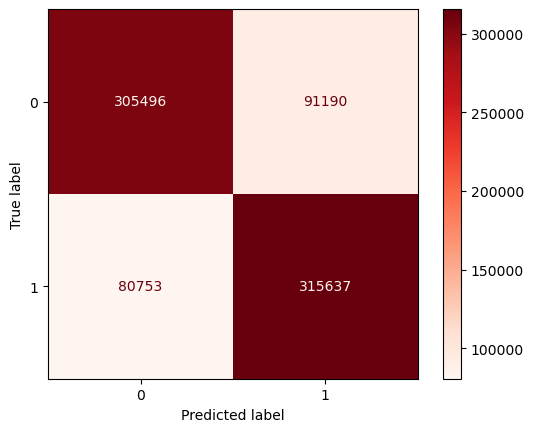

In [159]:
# Check Performance Model against Train-Set

y_pred_train = model_knn.predict(X_train_final)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_knn, X_train_final, y_train, cmap='Reds'))

Pada model KNN, Recall dari data train untuk class 1 sebesar 80% dan untuk class 0 sebesar 77% dengan waktu predict 22 menit, yang berarti model knn baik untuk mempredict orang yang actualnya Peminum pada data train

Jika kita lihat dari Confusion Matrix data train terdapat:
- True Positif = orang yang actual Peminum dan dipredict Peminum ada 315637 orang
- False Positif = orang yang actual bukan Peminum dan dipredict sebagai Peminum ada 91190 orang
- False Negatif = orang yang actual Peminum dan dipredict bukan Peminum ada 80753 orang
- True Negatif = orang yang actual bukan Peminum dan dipredict bukan Peminum ada 305496 orang

In [174]:
# Crossvalidation data Train
recall_train_cross_val = cross_val_score(model_knn,
                                     X_train_final,
                                     y_train,
                                     cv=3,
                                     scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('Recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

Recall Score - All - Cross Validation  :  [0.69815333 0.69930372 0.70049951]
Recall Score - Mean - Cross Validation :  0.6993188526451223
Recall Score - Std - Cross Validation  :  0.0009578814150984969
Recall Score - Range of Test-Set       :  0.6983609712300238 - 0.7002767340602207


### Cek Performa model KNN pada data Test

F1 Score - Test Set  :  0.6887602058046445 

Classification Report : 
               precision    recall  f1-score   support

           0       0.69      0.67      0.68     99172
           1       0.68      0.70      0.69     99098

    accuracy                           0.68    198270
   macro avg       0.68      0.68      0.68    198270
weighted avg       0.68      0.68      0.68    198270
 

Confusion Matrix      : 


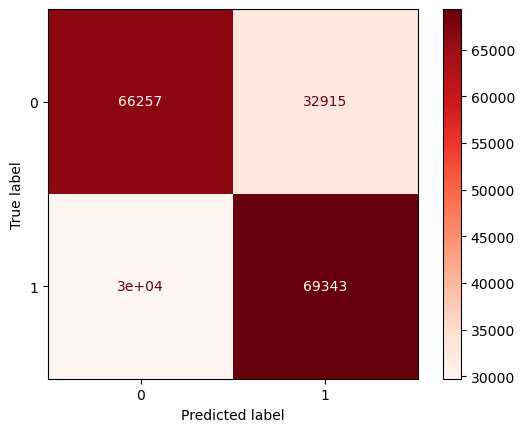

In [160]:
# Check Performance Model against Train-Set

y_pred_test = model_knn.predict(X_test_final)

print('F1 Score - Test Set  : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_knn, X_test_final, y_test, cmap='Reds'))

Pada model KNN, Recall dari data test untuk class 1 sebesar 70% dan untuk class 0 sebesar 67% dengan waktu predict 5 menit, yang berarti model knn kurang baik untuk mempredict orang yang actualnya Peminum pada data test

Jika kita lihat dari Confusion Matrix data test terdapat:
- True Positif = orang yang actual Peminum dan dipredict Peminum ada 69343 orang
- False Positif = orang yang actual bukan Peminum dan dipredict sebagai Peminum ada 32915 orang
- False Negatif = orang yang actual Peminum dan dipredict bukan Peminum ada +- 30000 orang
- True Negatif = orang yang actual bukan Peminum dan dipredict bukan Peminum ada 66257 orang

### Simpan Report Model KNN pada dataframe

In [161]:
# Save Classification Report into a Dictionary

all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
  score_reports = {
      'train - precision' : precision_score(y_train, y_pred_train),
      'train - recall' : recall_score(y_train, y_pred_train),
      'train - accuracy' : accuracy_score(y_train, y_pred_train),
      'train - f1_score' : f1_score(y_train, y_pred_train),
      'test - precision' : precision_score(y_test, y_pred_test),
      'test - recall' : recall_score(y_test, y_pred_test),
      'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
      'test - f1_score' : f1_score(y_test, y_pred_test),
  }
  all_reports[name] = score_reports
  return all_reports

all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'K-Neighbors Nearest (Default)')
pd.DataFrame(all_reports)

,K-Neighbors Nearest (Default)
test - accuracy_score,0.683916
test - f1_score,0.688760
test - precision,0.678118
test - recall,0.699742
train - accuracy,0.783195
train - f1_score,0.785932
train - precision,0.775851
train - recall,0.796279


## Evaluasi Model SVM

### Cek Performa model SVM pada data Train

F1 Score - Train Set  :  0.7352058635446899 

Classification Report : 
               precision    recall  f1-score   support

           0       0.74      0.71      0.73     50284
           1       0.72      0.75      0.74     49716

    accuracy                           0.73    100000
   macro avg       0.73      0.73      0.73    100000
weighted avg       0.73      0.73      0.73    100000
 

Confusion Matrix      : 


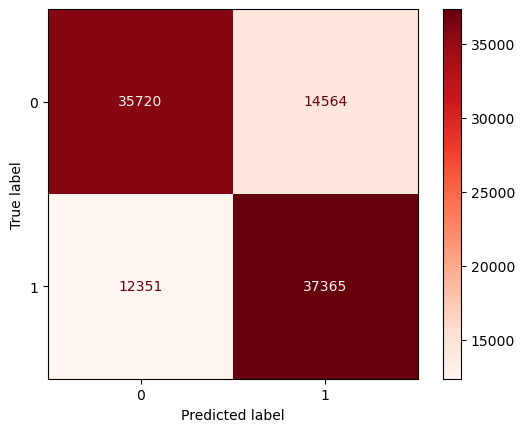

In [162]:
# Check Performance Model against Train-Set

y_pred_train = model_SVM.predict(X_train_final_sample)

print('F1 Score - Train Set  : ', f1_score(y_train_sample, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train_sample, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_SVM, X_train_final_sample, y_train_sample, cmap='Reds'))

Pada model SVM, Recall dari data train untuk class 1 sebesar 75% dan untuk class 0 sebesar 71% dengan waktu predict 21 menit dengan data sample sebanyak 100000 data, yang berarti model SVM cukup baik untuk mempredict orang yang actualnya Peminum pada data train

Jika kita lihat dari Confusion Matrix data train terdapat:
- True Positif = orang yang actual Peminum dan dipredict Peminum ada 37365 orang
- False Positif = orang yang actual bukan Peminum dan dipredict sebagai Peminum ada 14564 orang
- False Negatif = orang yang actual Peminum dan dipredict bukan Peminum ada 12351 orang
- True Negatif = orang yang actual bukan Peminum dan dipredict bukan Peminum ada 35720 orang

In [175]:
# Crossvalidation data Train
recall_train_cross_val = cross_val_score(model_SVM,
                                     X_train_final_sample,
                                     y_train_sample,
                                     cv=3,
                                     scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('Recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

Recall Score - All - Cross Validation  :  [0.74698286 0.7516896  0.74879315]
Recall Score - Mean - Cross Validation :  0.7491552015447743
Recall Score - Std - Cross Validation  :  0.001938496066160849
Recall Score - Range of Test-Set       :  0.7472167054786135 - 0.7510936976109351


### Cek Performa model SVM pada data Test

F1 Score - Test Set  :  0.7306581502400173 

Classification Report : 
               precision    recall  f1-score   support

           0       0.74      0.70      0.72     99172
           1       0.71      0.75      0.73     99098

    accuracy                           0.72    198270
   macro avg       0.72      0.72      0.72    198270
weighted avg       0.72      0.72      0.72    198270
 

Confusion Matrix      : 


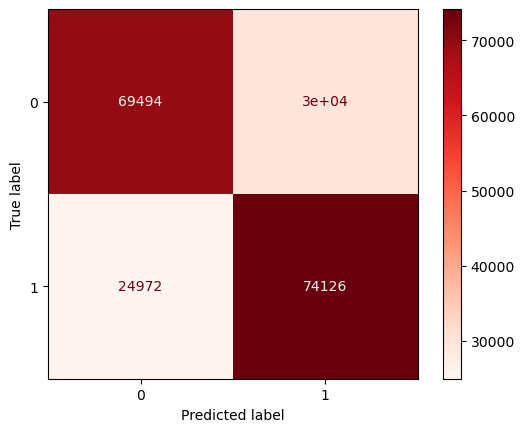

In [163]:
# Check Performance Model against Train-Set

y_pred_test = model_SVM.predict(X_test_final)

print('F1 Score - Test Set  : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_SVM, X_test_final, y_test, cmap='Reds'))

Pada model SVM, Recall dari data test untuk class 1 sebesar 75% dan untuk class 0 sebesar 70% dengan waktu predict 42 menit, yang berarti model SVM cukup baik untuk mempredict orang yang actualnya Peminum pada data test

Jika kita lihat dari Confusion Matrix data test terdapat:
- True Positif = orang yang actual Peminum dan dipredict Peminum ada 74126 orang
- False Positif = orang yang actual bukan Peminum dan dipredict sebagai Peminum ada +- 30000 orang
- False Negatif = orang yang actual Peminum dan dipredict bukan Peminum ada 24972 orang
- True Negatif = orang yang actual bukan Peminum dan dipredict bukan Peminum ada 69494 orang

### Simpan Report Model SVM pada dataframe

In [164]:
# Save Classification Report into a Dictionary

all_reports = performance_report(all_reports, y_train_sample, y_pred_train, y_test, y_pred_test, 'SVM (default)')
pd.DataFrame(all_reports)

,K-Neighbors Nearest (Default),SVM (default)
train - precision,0.775851,0.719540
train - recall,0.796279,0.751569
train - accuracy,0.783195,0.730850
train - f1_score,0.785932,0.735206
test - precision,0.678118,0.714096
test - recall,0.699742,0.748007
test - accuracy_score,0.683916,0.724366
test - f1_score,0.688760,0.730658


## Evaluasi Model Decision Tree

### Cek Performa model Decision Tree pada data Train

F1 Score - Train Set  :  1.0 



Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    396686
           1       1.00      1.00      1.00    396390

    accuracy                           1.00    793076
   macro avg       1.00      1.00      1.00    793076
weighted avg       1.00      1.00      1.00    793076
 

Confusion Matrix      : 


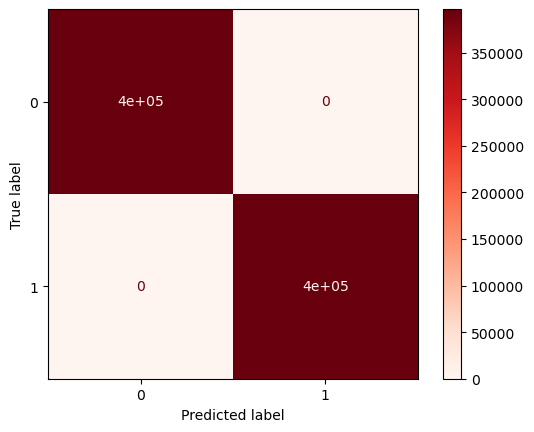

In [165]:
# Check Performance Model against Train-Set

y_pred_train = model_dt.predict(X_train_final)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_dt, X_train_final, y_train, cmap='Reds'))

Pada model Decision Tree, Recall dari data train untuk class 1 sebesar 100% dan untuk class 0 sebesar 100%, yang berarti model Decision Tree sangat baik untuk mempredict orang yang actualnya Peminum pada data train

Jika kita lihat dari Confusion Matrix data train terdapat:
- True Positif = orang yang actual Peminum dan dipredict Peminum ada +-400000 orang
- False Positif = orang yang actual bukan Peminum dan dipredict sebagai Peminum ada 0 orang
- False Negatif = orang yang actual Peminum dan dipredict bukan Peminum ada 0 orang
- True Negatif = orang yang actual bukan Peminum dan dipredict bukan Peminum ada +-400000 orang

In [176]:
# Crossvalidation data Train
recall_train_cross_val = cross_val_score(model_dt,
                                     X_train_final,
                                     y_train,
                                     cv=3,
                                     scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('Recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

Recall Score - All - Cross Validation  :  [0.64683266 0.64649966 0.64724892]
Recall Score - Mean - Cross Validation :  0.6468604152476097
Recall Score - Std - Cross Validation  :  0.0003065137142436876
Recall Score - Range of Test-Set       :  0.646553901533366 - 0.6471669289618535


### Cek Performa model Decison Tree pada data Test

F1 Score - Test Set  :  0.6446165310561508 

Classification Report : 
               precision    recall  f1-score   support

           0       0.64      0.64      0.64     99172
           1       0.64      0.65      0.64     99098

    accuracy                           0.64    198270
   macro avg       0.64      0.64      0.64    198270
weighted avg       0.64      0.64      0.64    198270
 

Confusion Matrix      : 


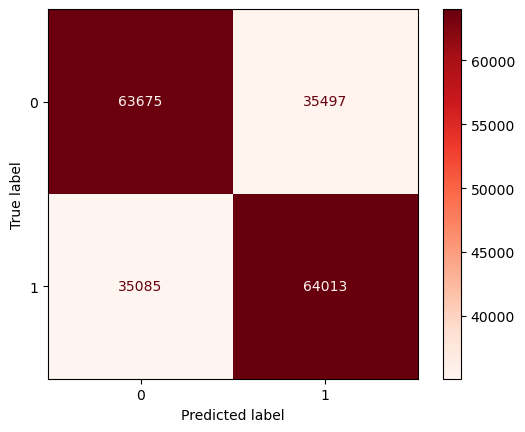

In [166]:
# Check Performance Model against Train-Set

y_pred_test = model_dt.predict(X_test_final)

print('F1 Score - Test Set  : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_dt, X_test_final, y_test, cmap='Reds'))

Pada model Decision Tree, Recall dari data test untuk class 1 sebesar 65% dan untuk class 0 sebesar 64%, yang berarti model Decision Tree kurang baik untuk mempredict orang yang actualnya Peminum pada data test

Jika kita lihat dari Confusion Matrix data test terdapat:
- True Positif = orang yang actual Peminum dan dipredict Peminum ada 64013 orang
- False Positif = orang yang actual bukan Peminum dan dipredict sebagai Peminum ada 35497 orang
- False Negatif = orang yang actual Peminum dan dipredict bukan Peminum ada 35085 orang
- True Negatif = orang yang actual bukan Peminum dan dipredict bukan Peminum ada 63675 orang

### Simpan Report Model Decision Tree pada dataframe

In [167]:
# Save Classification Report into a Dictionary

all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Decision Tree (default)')
pd.DataFrame(all_reports)

,K-Neighbors Nearest (Default),SVM (default),Decision Tree (default)
train - precision,0.775851,0.719540,1.000000
train - recall,0.796279,0.751569,1.000000
train - accuracy,0.783195,0.730850,1.000000
train - f1_score,0.785932,0.735206,1.000000
test - precision,0.678118,0.714096,0.643282
test - recall,0.699742,0.748007,0.645957
test - accuracy_score,0.683916,0.724366,0.644011
test - f1_score,0.688760,0.730658,0.644617


## Evaluasi Model Random Forest

### Cek Performa model Random Forest pada data Train

F1 Score - Train Set  :  0.9999974772320189 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    396686
           1       1.00      1.00      1.00    396390

    accuracy                           1.00    793076
   macro avg       1.00      1.00      1.00    793076
weighted avg       1.00      1.00      1.00    793076
 

Confusion Matrix      : 


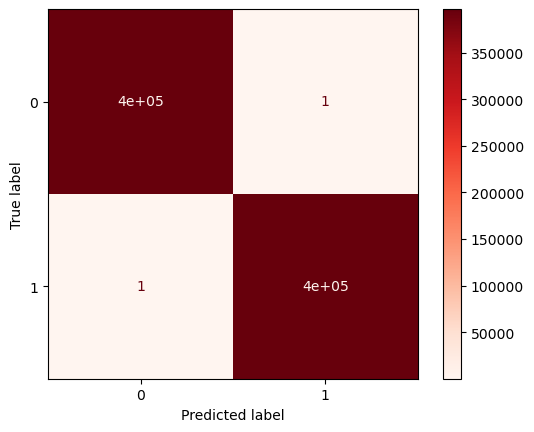

In [168]:
# Check Performance Model against Train-Set

y_pred_train = model_rf.predict(X_train_final)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_rf, X_train_final, y_train, cmap='Reds'))

Pada model Random Forest, Recall dari data train untuk class 1 sebesar 100% dan untuk class 0 sebesar 100%, yang berarti model Random Forest sangat baik untuk mempredict orang yang actualnya Peminum pada data train

Jika kita lihat dari Confusion Matrix data train terdapat:
- True Positif = orang yang actual Peminum dan dipredict Peminum ada +-400000 orang
- False Positif = orang yang actual bukan Peminum dan dipredict sebagai Peminum ada 1 orang
- False Negatif = orang yang actual Peminum dan dipredict bukan Peminum ada 1 orang
- True Negatif = orang yang actual bukan Peminum dan dipredict bukan Peminum ada +-400000 orang

In [177]:
# Crossvalidation data Train
recall_train_cross_val = cross_val_score(model_rf,
                                     X_train_final,
                                     y_train,
                                     cv=3,
                                     scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('Recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

Recall Score - All - Cross Validation  :  [0.7337622  0.73594944 0.73560887]
Recall Score - Mean - Cross Validation :  0.7351068392239966
Recall Score - Std - Cross Validation  :  0.0009609130183656201
Recall Score - Range of Test-Set       :  0.7341459262056309 - 0.7360677522423622


### Cek Performa model Random Forest pada data Test

F1 Score - Test Set  :  0.731719118566158 

Classification Report : 
               precision    recall  f1-score   support

           0       0.73      0.73      0.73     99172
           1       0.73      0.73      0.73     99098

    accuracy                           0.73    198270
   macro avg       0.73      0.73      0.73    198270
weighted avg       0.73      0.73      0.73    198270
 

Confusion Matrix      : 


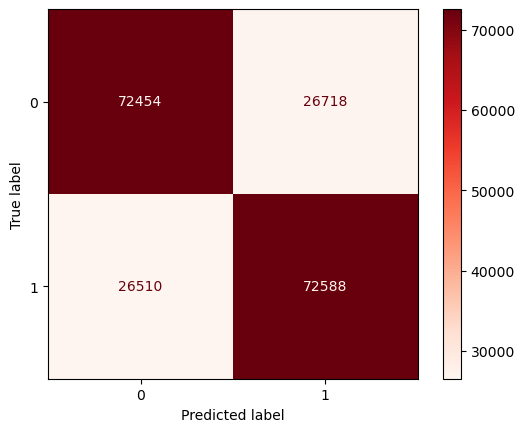

In [169]:
# Check Performance Model against Train-Set

y_pred_test = model_rf.predict(X_test_final)

print('F1 Score - Test Set  : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_rf, X_test_final, y_test, cmap='Reds'))

Pada model Random Forest, Recall dari data test untuk class 1 sebesar 73% dan untuk class 0 sebesar 73%, yang berarti model Random Forest sangat baik untuk mempredict orang yang actualnya Peminum pada data test

Jika kita lihat dari Confusion Matrix data test terdapat:
- True Positif = orang yang actual Peminum dan dipredict Peminum ada 72588 orang
- False Positif = orang yang actual bukan Peminum dan dipredict sebagai Peminum ada 26718 orang
- False Negatif = orang yang actual Peminum dan dipredict bukan Peminum ada 26510 orang
- True Negatif = orang yang actual bukan Peminum dan dipredict bukan Peminum ada 72454 orang

### Simpan Report Model Random Forest pada dataframe

In [170]:
# Save Classification Report into a Dictionary

all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Random Forest (default)')
pd.DataFrame(all_reports)

,K-Neighbors Nearest (Default),SVM (default),Decision Tree (default),Random Forest (default)
train - precision,0.775851,0.719540,1.000000,0.999997
train - recall,0.796279,0.751569,1.000000,0.999997
train - accuracy,0.783195,0.730850,1.000000,0.999997
train - f1_score,0.785932,0.735206,1.000000,0.999997
test - precision,0.678118,0.714096,0.643282,0.730953
test - recall,0.699742,0.748007,0.645957,0.732487
test - accuracy_score,0.683916,0.724366,0.644011,0.731538
test - f1_score,0.688760,0.730658,0.644617,0.731719


## Evaluasi Model Decision Tree dengan Adaboosting

### Cek Perfoma model Adaboost pada data Train

F1 Score - Train Set  :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    396686
           1       1.00      1.00      1.00    396390

    accuracy                           1.00    793076
   macro avg       1.00      1.00      1.00    793076
weighted avg       1.00      1.00      1.00    793076
 

Confusion Matrix      : 


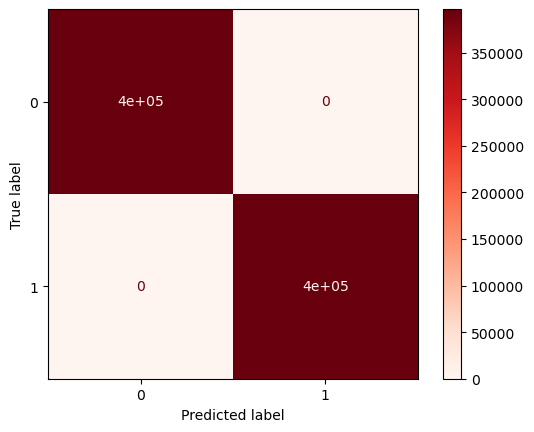

In [184]:
# Check Performance Model against Train-Set

y_pred_train = adaboost_clf.predict(X_train_final)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(adaboost_clf, X_train_final, y_train, cmap='Reds'))

Pada model Adaboost Decision Tree, Recall dari data train untuk class 1 sebesar 100% dan untuk class 0 sebesar 100%, yang berarti model Adaboost Decision Tree sangat baik untuk mempredict orang yang actualnya Peminum pada data train

Jika kita lihat dari Confusion Matrix data train terdapat:
- True Positif = orang yang actual Peminum dan dipredict Peminum ada +-400000 orang
- False Positif = orang yang actual bukan Peminum dan dipredict sebagai Peminum ada 0 orang
- False Negatif = orang yang actual Peminum dan dipredict bukan Peminum ada 0 orang
- True Negatif = orang yang actual bukan Peminum dan dipredict bukan Peminum ada +-400000 orang

In [188]:
# Crossvalidation data Train
recall_train_cross_val = cross_val_score(adaboost_clf,
                                     X_train_final,
                                     y_train,
                                     cv=3,
                                     scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('Recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

Recall Score - All - Cross Validation  :  [0.64671157 0.64510709 0.646704  ]
Recall Score - Mean - Cross Validation :  0.6461742223567698
Recall Score - Std - Cross Validation  :  0.0007545817904141197
Recall Score - Range of Test-Set       :  0.6454196405663557 - 0.6469288041471839


### Cek Perfoma model Adaboost pada data Test

F1 Score - Test Set  :  0.6458035552513437 

Classification Report : 
               precision    recall  f1-score   support

           0       0.65      0.64      0.64     99172
           1       0.64      0.65      0.65     99098

    accuracy                           0.65    198270
   macro avg       0.65      0.65      0.65    198270
weighted avg       0.65      0.65      0.65    198270
 

Confusion Matrix      : 


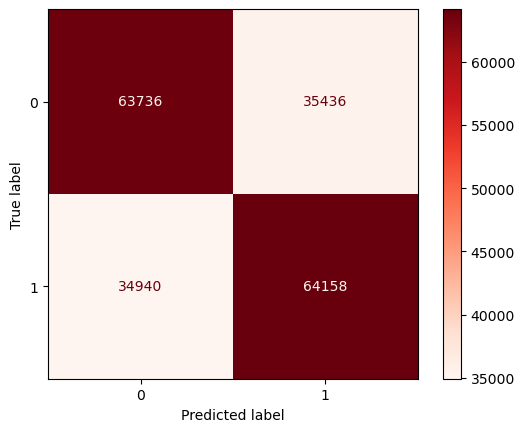

In [185]:
# Check Performance Model against Train-Set

y_pred_test = adaboost_clf.predict(X_test_final)

print('F1 Score - Test Set  : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(adaboost_clf, X_test_final, y_test, cmap='Reds'))

Pada model Adaboost Decision Tree, Recall dari data test untuk class 1 sebesar 65% dan untuk class 0 sebesar 64%, yang berarti model Adaboost Decision Tree kurang baik untuk mempredict orang yang actualnya Peminum pada data test

Jika kita lihat dari Confusion Matrix data test terdapat:
- True Positif = orang yang actual Peminum dan dipredict Peminum ada 64158 orang
- False Positif = orang yang actual bukan Peminum dan dipredict sebagai Peminum ada 35436 orang
- False Negatif = orang yang actual Peminum dan dipredict bukan Peminum ada 34940 orang
- True Negatif = orang yang actual bukan Peminum dan dipredict bukan Peminum ada 63736 orang

### Simpan Report Model Adaboost pada dataframe

In [186]:
# Save Classification Report into a Dictionary

all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Adaboosting DT')
pd.DataFrame(all_reports)

,K-Neighbors Nearest (Default),SVM (default),Decision Tree (default),Random Forest (default),Adaboosting DT
train - precision,0.775851,0.719540,1.000000,0.999997,1.000000
train - recall,0.796279,0.751569,1.000000,0.999997,1.000000
train - accuracy,0.783195,0.730850,1.000000,0.999997,1.000000
train - f1_score,0.785932,0.735206,1.000000,0.999997,1.000000
test - precision,0.678118,0.714096,0.643282,0.730953,0.644195
test - recall,0.699742,0.748007,0.645957,0.732487,0.647420
test - accuracy_score,0.683916,0.724366,0.644011,0.731538,0.645050
test - f1_score,0.688760,0.730658,0.644617,0.731719,0.645804


## Kesimpulan Evaluasi Model KNN, SVM, Decision Tree dan Random Forest

In [187]:
pd.DataFrame(all_reports)

,K-Neighbors Nearest (Default),SVM (default),Decision Tree (default),Random Forest (default),Adaboosting DT
train - precision,0.775851,0.719540,1.000000,0.999997,1.000000
train - recall,0.796279,0.751569,1.000000,0.999997,1.000000
train - accuracy,0.783195,0.730850,1.000000,0.999997,1.000000
train - f1_score,0.785932,0.735206,1.000000,0.999997,1.000000
test - precision,0.678118,0.714096,0.643282,0.730953,0.644195
test - recall,0.699742,0.748007,0.645957,0.732487,0.647420
test - accuracy_score,0.683916,0.724366,0.644011,0.731538,0.645050
test - f1_score,0.688760,0.730658,0.644617,0.731719,0.645804


Berdasarkan tabel perbandingan nilai recall diatas dan hasil perhitungan nilai perfoma dari cross valdation didapat:
1. Pada model KNN recall untuk data train sebesar 79% dan untuk data test sebesar 69%. Recall Score - Mean - Cross Validation :  69% dan Recall Score - Std - Cross Validation  :  0.0009578814150984969
2. Pada model SVM recall untuk data train sebesar 75% dan untuk data test sebesar 74%. Recall Score - Mean - Cross Validation :  74% dan Recall Score - Std - Cross Validation  : 0.001938496066160849
3. Pada model Decision Tree recall untuk data train sebesar 100% dan untuk data test sebesar 64%. Recall Score - Mean - Cross Validation :  64% dan Recall Score - Std - Cross Validation  :  0.0003065137142436876
4. Pada model Random Forest recall untuk data train sebesar 99% dan untuk data test sebesar 73%. Recall Score - Mean - Cross Validation :  73% dan Recall Score - Std - Cross Validation  :  0.0009609130183656201
5. Pada model Adaboost Decision Tree recall untuk data train sebesar 100% dan untuk data test sebesar 64%. Recall Score - Mean - Cross Validation :  64% dan Recall Score - Std - Cross Validation  :  0.0007545817904141197

Dari statement diatas dapat disimpulkan bahwa untuk model yang baik kita bisa menggunakan SVM atau Random Forest namun mengingat proses pada model SVM membutuhkan waktu yang lebih lama untuk data yang banyak. Sehingga kita simpulkan untuk menggunakan model Random Forest yang akan kita coba berikan hyperparameter tunning 

## Hyperparameter Tunning Random Forest

**Hyperparameter menggunakan gridsearch**

In [65]:
# Define Hyperparameters
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num = 3)]
max_depth = [int(x) for x in np.linspace(10, 100, 2)]
min_samples_split = [3]
min_samples_leaf = [3, 7]
grid_search_params = {'n_estimators': n_estimators,
                        'max_depth':max_depth,
                        'min_samples_split':min_samples_split,
                        'min_samples_leaf':min_samples_leaf}
grid_search_params

{'n_estimators': [100, 550, 1000],
 'max_depth': [10, 100],
 'min_samples_split': [3],
 'min_samples_leaf': [3, 7]}

In [66]:
# Train with Grid Search
rf_gridcv = GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=grid_search_params,
                         cv=5,
                         n_jobs=-1,
                         verbose=2,
                         scoring='recall')

rf_gridcv.fit(X_train_final_sample, y_train_sample)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 100], 'min_samples_leaf': [3, 7],
                         'min_samples_split': [3],
                         'n_estimators': [100, 550, 1000]},
             scoring='recall', verbose=2)

Best Param

In [67]:
# Get Best Param
rf_gridcv.best_params_

{'max_depth': 100,
 'min_samples_leaf': 7,
 'min_samples_split': 3,
 'n_estimators': 1000}

Best Estimator

In [68]:
# Get Best Param
rf_gridcv_best = rf_gridcv.best_estimator_

**Predict terhadap data Train dari hasil best estimator GridSearch**

F1 Score - Train Set  :  0.7538657576535892 

Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.74      0.75    396686
           1       0.75      0.76      0.75    396390

    accuracy                           0.75    793076
   macro avg       0.75      0.75      0.75    793076
weighted avg       0.75      0.75      0.75    793076
 

Confusion Matrix      : 


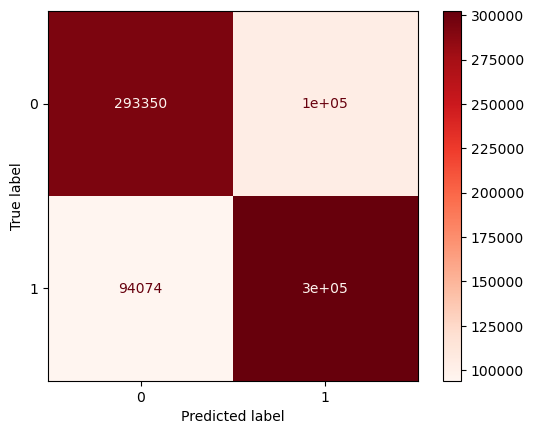

In [69]:
# Check Performance Model against Train-Set

y_pred_train = rf_gridcv_best.predict(X_train_final)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_gridcv_best, X_train_final, y_train, cmap='Reds'))

**Predict terhadap data Test dari hasil best estimator GridSearch**

F1 Score - Test Set  :  0.7357783649037959 

Classification Report : 
               precision    recall  f1-score   support

           0       0.74      0.72      0.73     99172
           1       0.73      0.75      0.74     99098

    accuracy                           0.73    198270
   macro avg       0.73      0.73      0.73    198270
weighted avg       0.73      0.73      0.73    198270
 

Confusion Matrix      : 


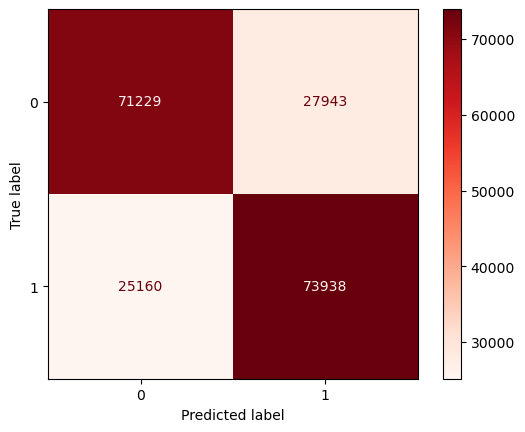

In [70]:
# Check Performance Model against Test-Set

y_pred_test = rf_gridcv_best.predict(X_test_final)

print('F1 Score - Test Set  : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_gridcv_best, X_test_final, y_test, cmap='Reds'))

Setelah kita lakukan predict menggunakan hyperparameter tunning terhadap data train dan test untuk model Random Forest hasilnya recall score nya pada data train mengalami penurunan setelah hyperparameter tunning sedangkan untuk data testnya mengalami peningkatan namun tidak signifikan dari 0.73 menjadi 0.75

# 9. Model Saving

In [71]:
# Save the Files

import pickle, joblib
import json

with open('rf_gridcv_best.pkl', 'wb') as file_1:
  pickle.dump(rf_gridcv_best, file_1)

with open('preprocessing_pipeline.pkl', 'wb') as file_2:
  pickle.dump(preprocessing_pipeline, file_2)

with open('list_num_cols.txt', 'w') as file_4:
  json.dump(cat_list, file_4)

with open('list_cat_cols.txt','w') as file_5:
  json.dump(num_list, file_5)

# 10. Pengambilan Kesimpulan

Saat Evaluasi model antara KNN, SVM, Decision Tree, Random Forest dan Adaboost Decision Tree disimpulkan bahwa terdapat 2 model yang baik dalam memprediksi sesesorang merupakan Peminum yaitu SVM dan Random Forest berdasarkan nilai mean cross validationnya. Hanya saja proses pada model SVM memakan memory dan waktu yang lama dengan 900000 data sehingga kita memutuskan untuk menggunakan model Random Forest yang akan kita lakukan Hyperparameter tunning.

Setelah kita lakukan Hyperparameter tunning dan lakukan predict pada data train dan test untuk model Random Forest hasil recall score nya pada data train mengalami penurunan setelah hyperparameter tunning sedangkan untuk data testnya mengalami peningkatan namun tidak signifikan dari 0.73 menjadi 0.75 sehingga disimpulkan model sudah cukup baik untuk memprediksi seseorang merupakan Peminum.

## Conceptual Problems

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !\
Bagging dikembangkan sebagai metode untuk mengatasi masalah overfitting dalam machine learning.\
Cara Kerja Bagging : - setiap model dilatih secara independen pada sub kumpulan data train yang berbeda.\
                     - prediksi dari masing masing sub data train kemudian digabungkan biasanya untuk kasus regresi diambil nilai rata ratanya dan untuk kasus klasifikasi diambil modusnya

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !
- Random Forest: secara berkali-kali melakukan bootstrap terhadap data training dan menyusun pohon klasifikasi berdasarkan data hasil resampling tersebut, dan kemudian proses prediksi dilakukan dengan mengagregasi hasil prediksi dari banyak pohon yang umumnya menggunakan pendekatan majority vote. proses predict tidak bergantung pada pohon lain
- Adaboost : proses predict bergantung pada pohon lain(sekuensial)

3. Jelaskan apa yang dimaksud dengan Cross Validation !
Cross validation adalah teknik evaluasi kinerja model berdasarkan sub dari data train tujuannya untuk mengevaluasi kinerja model pada data yang belum pernah di train sebelumnya. 